In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data= pd.read_csv("C:/Users/Dell/OneDrive/Desktop/competitons/Worksheet in 6796bd2167e3d_HexaMart_Case.csv", encoding= "ISO-8859-1")

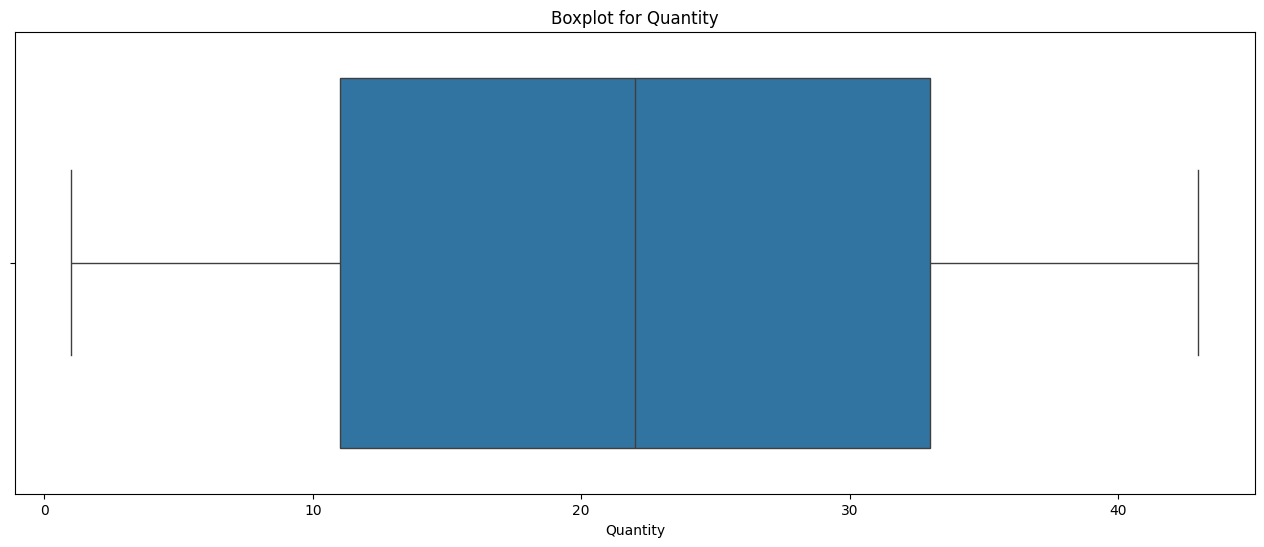

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (16,6))
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot for Quantity')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() 
numeric_features = ['Quantity', 'Unit Price', 'Total Sales', 'Profit'] 
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [5]:
categorical_cols = ["Region", "Product Line"]

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data_encoded.head())

   Customer ID  Quantity   Order ID Customer Type Payment Method  \
0        40333  1.255522   SCHE-867           Pro    Credit Card   
1        18111  1.494868  NDEL-5690           Pro    Net Banking   
2        37699 -1.696404  WPAN-3389       Regular    Net Banking   
3        36722  0.138577  ERAN-8249       Regular    Net Banking   
4        21943 -0.340114  NDEH-1618       Regular    Credit Card   

  Date of Order      City  Unit Price  Total Sales    Profit  \
0    29-11-2015   Chennai    1.511982     2.544164  2.290561   
1    12-11-2016     Delhi    1.034463     2.249903 -1.682246   
2    08-01-2015    Panaji    1.300678    -1.069803 -0.579419   
3    01-01-2017    Ranchi   -0.203820    -0.055051  0.370911   
4    23-04-2018  Dehradun    0.013045    -0.214540 -0.772169   

   Region_North India  Region_South India  Region_West India  \
0               False                True              False   
1                True               False              False   
2             

In [6]:
bool_cols = data_encoded.select_dtypes(include=['bool']).columns

# Convert only boolean columns to integers (0/1)
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

print(data_encoded.dtypes)

Customer ID                          int64
Quantity                           float64
Order ID                            object
Customer Type                       object
Payment Method                      object
Date of Order                       object
City                                object
Unit Price                         float64
Total Sales                        float64
Profit                             float64
Region_North India                   int32
Region_South India                   int32
Region_West India                    int32
Product Line_Food and Beverages      int32
Product Line_Home Décor              int32
Product Line_Kitchen Appliances      int32
Product Line_Skincare                int32
Product Line_Sports                  int32
Product Line_Technology              int32
dtype: object


In [7]:
x= data_encoded.drop(columns= ["Profit", "Customer ID", "Quantity", "Order ID", "Payment Method", "Date of Order", "City", "Customer Type","Unit Price", "Total Sales"])
y= data_encoded['Quantity']

In [8]:
print(y.dtype)

float64


In [9]:
print(x.head())

   Region_North India  Region_South India  Region_West India  \
0                   0                   1                  0   
1                   1                   0                  0   
2                   0                   0                  1   
3                   0                   0                  0   
4                   1                   0                  0   

   Product Line_Food and Beverages  Product Line_Home Décor  \
0                                0                        1   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   Product Line_Kitchen Appliances  Product Line_Skincare  \
0                                0                      0   
1                                0                      0   
2                                1                   

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [11]:
print(x_train.dtypes)

Region_North India                 int32
Region_South India                 int32
Region_West India                  int32
Product Line_Food and Beverages    int32
Product Line_Home Décor            int32
Product Line_Kitchen Appliances    int32
Product Line_Skincare              int32
Product Line_Sports                int32
Product Line_Technology            int32
dtype: object


In [12]:
print(x.shape, x_train.shape, x_test.shape)

(3908, 9) (3126, 9) (782, 9)


In [13]:
print(y.shape, y_train.shape, y_test.shape)

(3908,) (3126,) (782,)


In [14]:
model= RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
x_train_pred= model.predict(x_train)
print(x_train_pred)

[ 0.05192688 -0.08902757  0.05277716 ... -0.13462522 -0.06807764
 -0.09807077]


In [16]:
mse= mean_squared_error(x_train_pred, y_train)
print(mse)

0.9972434159048844


In [17]:
x_test_pred= model.predict(x_test)
print(x_test_pred)

[ 0.01496374  0.03575731 -0.03302122  0.21831372 -0.06807764 -0.05823512
 -0.14171822  0.1505373  -0.1883784   0.00839126 -0.1883784   0.00839126
 -0.00935901 -0.01329145 -0.03302122 -0.06998376 -0.00935901 -0.09807077
 -0.06998376  0.0165288   0.0383993  -0.0823707  -0.1883784  -0.03209223
 -0.08902757 -0.14171822  0.0383993   0.01988911  0.01988911 -0.01329145
  0.01988911 -0.03209223  0.00839126  0.06677752 -0.00935901  0.21831372
 -0.09807077 -0.08902757  0.01988911  0.02675873 -0.05823512 -0.14171822
 -0.05616112  0.0383993  -0.01329145 -0.06998376 -0.06998376 -0.01329566
 -0.06807764 -0.13462522  0.0165288  -0.0823707   0.0165288   0.01988911
  0.05192688 -0.13462522  0.00839126  0.1505373  -0.03302122  0.05192688
  0.02675873  0.01988911 -0.03209223  0.0383993  -0.09807077 -0.00935901
 -0.06807764 -0.0823707  -0.13462522  0.05192688 -0.00935901 -0.1883784
  0.0383993  -0.05616112  0.05192688  0.06677752  0.0383993   0.0165288
 -0.01329145 -0.1883784  -0.03302122 -0.13462522  0.0

In [18]:
mse2= mean_squared_error(x_test_pred, y_test)
print(mse2)

0.991108387712627


In [19]:
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                           Feature  Importance
6            Product Line_Skincare    0.222135
2                Region_West India    0.170476
1               Region_South India    0.118083
0               Region_North India    0.107117
8          Product Line_Technology    0.102807
4          Product Line_Home Décor    0.076256
3  Product Line_Food and Beverages    0.075988
7              Product Line_Sports    0.066293
5  Product Line_Kitchen Appliances    0.060845


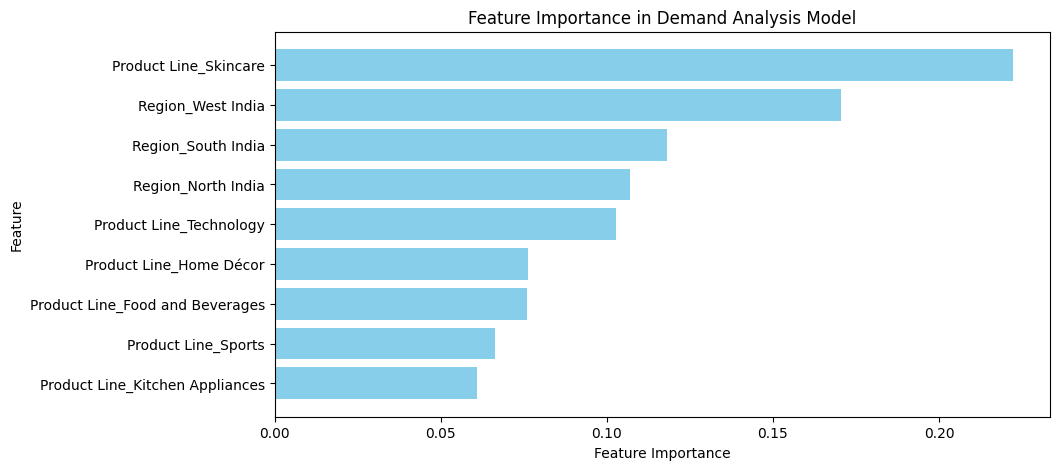

In [20]:

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Demand Analysis Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
